# Assignment: Exploratory Data Analysis with Pandas

In this assignment, you will use **Pandas** to explore the [Adult Census Income dataset](https://archive.ics.uci.edu/ml/datasets/Adult). The dataset contains demographic information about individuals, and a `salary` column indicating whether they earn `<=50K` or `>50K` per year.

**Instructions:**
- Write your code in the empty cells below each question.
- Run the setup cell first to load the data.
- Use `print()` to display your final answers.

## Setup: Load the Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


---
### Question 1
How many rows and columns does the dataset have? Use `.shape`.

In [2]:
# Your code here
data.shape

(32561, 15)

---
### Question 2
What are the column names and data types? Use `.info()` or `.dtypes`.

In [3]:
# Your code here
data.info()
data.dtypes

<class 'pandas.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  str  
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  str  
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  str  
 6   occupation      32561 non-null  str  
 7   relationship    32561 non-null  str  
 8   race            32561 non-null  str  
 9   sex             32561 non-null  str  
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  native-country  32561 non-null  str  
 14  salary          32561 non-null  str  
dtypes: int64(6), str(9)
memory usage: 3.7 MB


age               int64
workclass           str
fnlwgt            int64
education           str
education-num     int64
marital-status      str
occupation          str
relationship        str
race                str
sex                 str
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country      str
salary              str
dtype: object

---
### Question 3
How many men and women are in the dataset? Use `.value_counts()` on the `sex` column.

In [4]:
# Your code here
data.value_counts('sex')

sex
Male      21790
Female    10771
Name: count, dtype: int64

---
### Question 4
What is the average age of women in the dataset?

*Hint: Filter the dataframe where `sex == 'Female'`, then use `.mean()` on the `age` column.*

In [5]:
# Your code here
data[data['sex'] == 'Female']['age'].mean

<bound method Series.mean of 4        28
5        37
6        49
8        31
12       23
         ..
32546    37
32549    43
32556    27
32558    58
32560    52
Name: age, Length: 10771, dtype: int64>

---
### Question 5
What percentage of people in the dataset are from the United States?

*Hint: Filter on `native-country`, count the rows, and divide by the total number of rows.*

In [6]:
# Your code here
num_us = data[data['native-country']=='United-States'].value_counts('native-country').sum()
total = data.value_counts('native-country').sum()
num_us/total

np.float64(0.895857006848684)

---
### Question 6
What is the average age of people who earn **>50K** vs. those who earn **<=50K**?

*Hint: Use `.groupby('salary')['age'].mean()`.*

In [7]:
# Your code here
data.groupby('salary')['age'].mean()

salary
<=50K    36.783738
>50K     44.249841
Name: age, dtype: float64

---
### Question 7
What are the top 5 most common occupations in the dataset?

*Hint: Use `.value_counts()` and `.head(5)` on the `occupation` column.*

In [8]:
# Your code here
data['occupation'].value_counts().head(5)

occupation
Prof-specialty     4140
Craft-repair       4099
Exec-managerial    4066
Adm-clerical       3770
Sales              3650
Name: count, dtype: int64

---
### Question 8
What is the maximum number of hours a person works per week? How many people work that many hours?

*Hint: Use `.max()` to find the maximum, then filter and count.*

In [9]:
# Your code here
max_hours = data['hours-per-week'].max()
data[data['hours-per-week'] == max_hours].value_counts('hours-per-week')

hours-per-week
99    85
Name: count, dtype: int64

---
### Question 9
Display age statistics (count, mean, std, min, max) grouped by `race` and `sex`. Use `.groupby()` and `.describe()`.

Then answer: What is the maximum age of men in the `Amer-Indian-Eskimo` group?

In [10]:
# Your code here
data.groupby(['race','sex']).describe()

age                                          \
                             count       mean        std   min   25%   50%   
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                                         fnlwgt                 ...  \
                             75%   max    count           mean  ...   
race               sex                                          ...   
Amer-Indian-Eskimo Female  46.00  80.0    119.0  112950.731092  ...   
                   Male    45.00  82.0    192.0  125715.364583  ...   
Asian-Pac-Islander Female  43.75  75.0    346.0  147452.075145  ...   
                   Male    46.00  90.0    693.0  166175.865801  ...   
Black              Female  46.00  90.0   1555.0  212971.387781  ...   
                   Male    46.00  90.0   1569.0  242920.644997  ...   
Other              Female  39.00  74.0    109.0  172519.642202  ...   
                   Male    42.00  77.0    162.0  213679.104938  ...   
White              Female  46.00  90.0   8642.0  183549.966906  ...   
                   Male    49.00  90.0  19174.0  188987.386148  ...   

                          capital-loss         hours-per-week             \
                                   75%     max          count       mean   
race               sex                                                     
Amer-Indian-Eskimo Female          0.0  1721.0          119.0  36.579832   
                   Male            0.0  1980.0          192.0  42.197917   
Asian-Pac-Islander Female          0.0  2258.0          346.0  37.439306   
                   Male            0.0  2457.0          693.0  41.468975   
Black              Female          0.0  4356.0         1555.0  36.834084   
                   Male            0.0  2824.0         1569.0  39.997451   
Other              Female          0.0  1740.0          109.0  35.926606   
                   Male            0.0  2179.0          162.0  41.851852   
White              Female          0.0  4356.0         8642.0  36.296691   
                   Male            0.0  3770.0        19174.0  42.668822   

                                                                   
                                 std  min   25%   50%   75%   max  
race               sex                                             
Amer-Indian-Eskimo Female  11.046509  4.0  35.0  40.0  40.0  84.0  
                   Male    11.596280  3.0  40.0  40.0  45.0  84.0  
Asian-Pac-Islander Female  12.479459  1.0  35.0  40.0  40.0  99.0  
                   Male    12.387563  1.0  40.0  40.0  45.0  99.0  
Black              Female   9.419960  2.0  35.0  40.0  40.0  99.0  
                   Male    10.909413  1.0  40.0  40.0  40.0  99.0  
Other              Female  10.300761  6.0  30.0  40.0  40.0  65.0  
                   Male    11.084779  5.0  40.0  40.0  40.0  98.0  
White              Female  12.190951  1.0  30.0  40.0  40.0  99.0  
                   Male    12.194633  1.0  40.0  40.0  50.0  99.0  

[10 rows x 48 columns]

---
### Question 10
What is the average `hours-per-week` for each `salary` group (`<=50K` and `>50K`)?

*Hint: Use `.groupby('salary')['hours-per-week'].mean()`.*

In [11]:
# Your code here
data.groupby('salary')['hours-per-week'].mean()

salary
<=50K    38.840210
>50K     45.473026
Name: hours-per-week, dtype: float64

---
## Part 2: Groupby and Aggregation

The questions below require combining filtering, grouping, and aggregation.

---
### Question 11
For each `workclass`, compute the **mean age**, **mean hours-per-week**, and **count** of people. Sort the result by count in descending order.

*Hint: Use `.groupby('workclass').agg(...)` with named aggregations. Use `.sort_values()` to sort.*

In [12]:
# Your code here
data.groupby('workclass').agg({
    'age' : 'mean',
    'hours-per-week' : 'mean',
    'sex' : 'count'
}).sort_values('sex', ascending = False)

,age,hours-per-week,sex
workclass,,,
Private,36.797585,40.267096,22696
Self-emp-not-inc,44.969697,44.421881,2541
Local-gov,41.751075,40.982800,2093
?,40.960240,31.919390,1836
State-gov,39.436055,39.031587,1298
Self-emp-inc,46.017025,48.818100,1116
Federal-gov,42.590625,41.379167,960
Without-pay,47.785714,32.714286,14
Never-worked,20.571429,28.428571,7


---
### Question 12
For each `education` level, compute the **min**, **max**, and **mean** of `hours-per-week`. Sort by mean in descending order.

Which education level has the highest average working hours?

*Hint: Use `.groupby('education')['hours-per-week'].agg(['min', 'max', 'mean'])`.*

In [13]:
# Your code here
data.groupby('education')['hours-per-week'].agg(['min', 'max', 'mean']).sort_values('mean', ascending = False)

,min,max,mean
education,,,
Prof-school,2,99,47.425347
Doctorate,1,99,46.973366
Masters,1,99,43.836332
Bachelors,2,99,42.614006
Assoc-voc,1,99,41.610709
HS-grad,1,99,40.575374
Assoc-acdm,1,99,40.504217
7th-8th,2,99,39.366873
5th-6th,3,84,38.897898


---
### Question 13
Create a crosstab showing the **count** of people for each combination of `education` and `salary`. Then compute the **proportion** of `>50K` earners for each education level.

Which education level has the **highest** proportion of people earning >50K?

*Hint: Use `pd.crosstab(data['education'], data['salary'])`. To get proportions, divide the `>50K` column by the row total.*

In [14]:
# Your code here
cross_tab = pd.crosstab(data['education'], data['salary'])
cross_tab['Total'] = cross_tab['<=50K'] + cross_tab['>50K']
cross_tab['Proportion'] = cross_tab['>50K'] / cross_tab['Total']
cross_tab.sort_values('Proportion', ascending = False)

salary,<=50K,>50K,Total,Proportion
education,,,,
Doctorate,107,306,413,0.740920
Prof-school,153,423,576,0.734375
Masters,764,959,1723,0.556587
Bachelors,3134,2221,5355,0.414753
Assoc-voc,1021,361,1382,0.261216
Assoc-acdm,802,265,1067,0.248360
Some-college,5904,1387,7291,0.190235
HS-grad,8826,1675,10501,0.159509
12th,400,33,433,0.076212


---
### Question 14
Among people who work **more than 40 hours per week**, what is the average `capital-gain` for each `occupation`? Show only the **top 5** occupations by average capital-gain.

*Hint: First filter the dataframe for `hours-per-week > 40`, then use `.groupby('occupation')['capital-gain'].mean()` and `.sort_values(ascending=False).head(5)`.*

In [15]:
# Your code here
data[data['hours-per-week'] > 40].groupby('occupation')['capital-gain'].mean().sort_values(ascending = False).head(5)

occupation
Prof-specialty     4326.644819
Exec-managerial    3066.663636
Sales              2319.504930
?                  1365.927536
Craft-repair        821.451060
Name: capital-gain, dtype: float64

---
## Bonus (Extra Difficult)

### Bonus Question
Create a new column called `age_group` that bins ages into the following categories:
- `17-30`
- `31-45`
- `46-60`
- `61+`

Then, for **each `age_group` and `sex`**, compute a summary table with three columns:
1. **pct_over_50K** — the percentage of people earning >50K
2. **avg_hours_per_week** — the average hours worked per week
3. **most_common_occupation** — the most frequently occurring occupation

Display the result as a single DataFrame.

*Hints:*
- *Use `pd.cut()` to create the `age_group` column.*
- *Create a helper column like `is_over_50K = (data['salary'] == '>50K').astype(int)` to make computing the percentage easier.*
- *Use `.groupby(['age_group', 'sex']).agg(...)` with custom lambda functions.*
- *To find the most common value, use `.mode().iloc[0]` inside a lambda.*

In [ ]:
# Your code here


---
## Part 3: Data Visualization

The questions below require you to create visualizations using **matplotlib** and/or **seaborn**. Make sure your plots have appropriate titles, axis labels, and legends where needed.

---
### Question 15
Create a **histogram** of the `age` column with 20 bins. Add a title and axis labels.

*Hint: Use `data['age'].plot(kind='hist', bins=20)` or `plt.hist(data['age'], bins=20)`.*

Text(0, 0.5, 'Number of People')

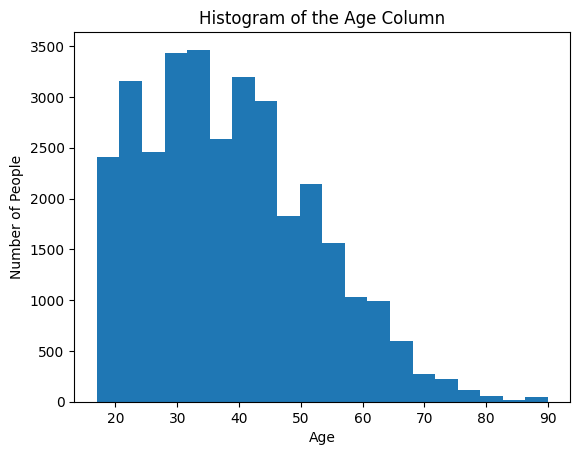

In [16]:
# Your code here
plt.hist(data['age'], bins=20)
plt.title('Histogram of the Age Column')
plt.xlabel('Age')
plt.ylabel('Number of People')

---
### Question 16
Create a **bar chart** showing the count of people in each `workclass` category. Rotate the x-axis labels for readability.

*Hint: Use `data['workclass'].value_counts().plot(kind='bar')`. Use `plt.xticks(rotation=45)` to rotate labels.*

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Private'),
  Text(1, 0, 'Self-emp-not-inc'),
  Text(2, 0, 'Local-gov'),
  Text(3, 0, '?'),
  Text(4, 0, 'State-gov'),
  Text(5, 0, 'Self-emp-inc'),
  Text(6, 0, 'Federal-gov'),
  Text(7, 0, 'Without-pay'),
  Text(8, 0, 'Never-worked')])

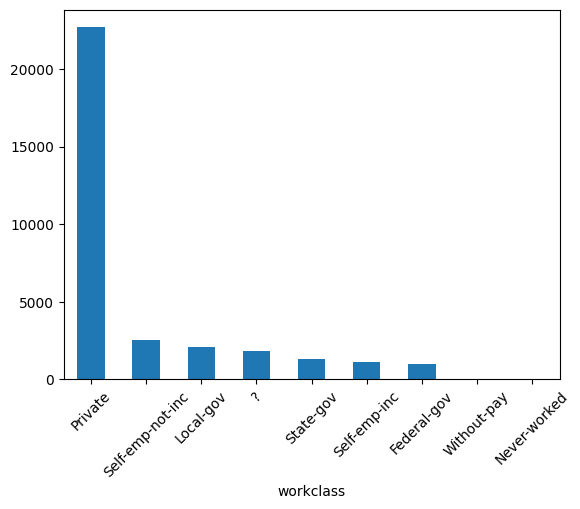

In [17]:
# Your code here
data['workclass'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)

---
### Question 17
Create a **boxplot** comparing the distribution of `age` across the two `salary` groups (`<=50K` and `>50K`).

What can you observe about the age distributions of the two groups?

*Hint: Use `sns.boxplot(x='salary', y='age', data=data)` or `data.boxplot(column='age', by='salary')`.*

<Axes: xlabel='salary', ylabel='age'>

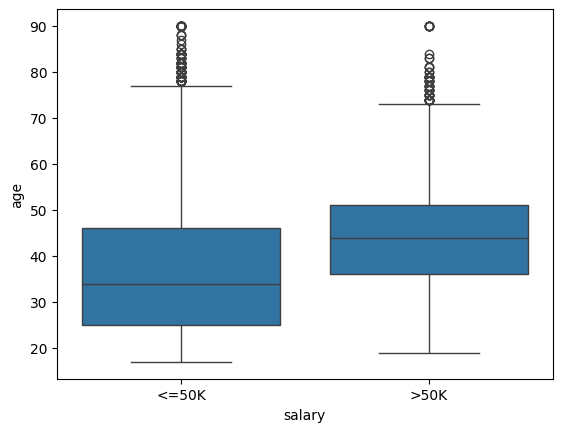

In [18]:
# Your code here
sns.boxplot(x='salary', y='age', data=data)